In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_experiment(path, title='Experiment _'):
    # Read the Excel file
    df = pd.read_excel(path, skiprows=range(0, 4))
    df.columns = df.columns.str.strip()
    df.rename(columns={'Time （s）': 'Time (s)'}, inplace=True)
    print(df.columns)
    
    df['Power (W)'] = df['Voltage  (V)'] * df['Current  (A)']

    # Print the first few rows of the dataframe to understand its structure
    print("Data from Excel file:")
    print(df.head())

    # Plotting the data
    df.plot(kind='line', x=df.columns[0], y=df.columns[1:])

    # Customize the plot
    plt.title(title)
    plt.xlabel(df.columns[0])
    plt.ylabel('Values')
    plt.grid(True, axis='y')
    plt.legend(title='Legend')

    # Show the plot
    plt.show()

['1_5ghz', '1_6ghz', '1_7ghz', '1_8ghz', '1_9ghz', '2_0ghz', '2_1ghz', '2_2ghz', '2_3ghz', '2_4ghz', 'on-demand']
[0.07025120551138889, 0.07532035703416666, 0.0780035295825, 0.08085777007083333, 0.08398784145, 0.0874561251675, 0.08954470838138891, 0.09296977443194447, 0.09778925191138887, 0.10089725351333331, 0.10073558033444444]


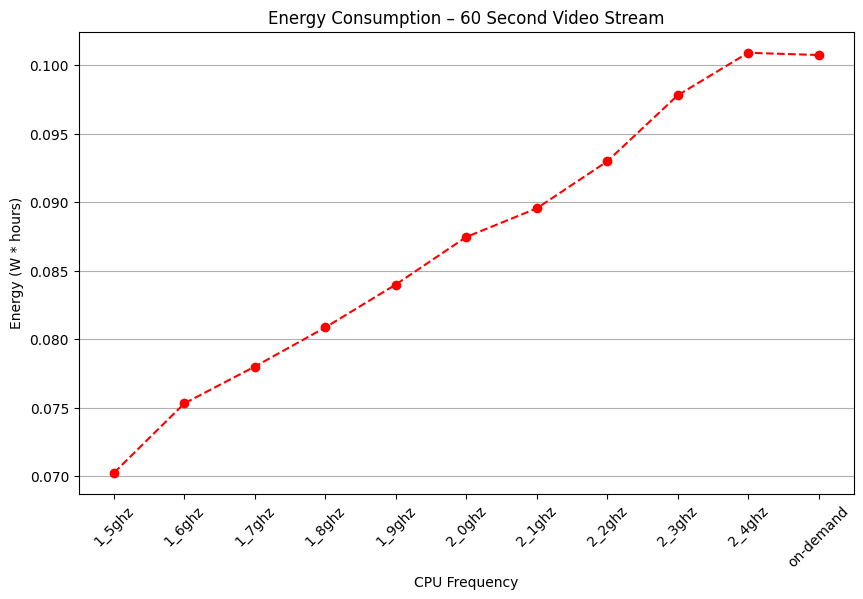

     1_5ghz    1_6ghz    1_7ghz    1_8ghz    1_9ghz    2_0ghz    2_1ghz  \
0  3.037722  3.276222  3.379922  3.391408  3.431144  3.728413  3.580273   
1  3.033732  3.278207  3.313078  2.996848  3.430954  3.566180  3.590418   
2  3.039036  3.292886  3.413501  3.364440  3.430272  3.565829  3.604681   
3  3.037344  3.282165  3.346364  3.357732  3.422891  3.553750  3.625305   
4  3.036610  2.894604  3.341985  3.371531  3.543994  3.549258  3.583223   

     2_2ghz    2_3ghz    2_4ghz  on-demand  
0  3.758895  3.787454  3.805397   2.987360  
1  3.746419  3.769542  3.822998   2.995657  
2  3.826274  4.882888  3.842445   3.004832  
3  3.787609  4.791634  3.816001   3.002518  
4  3.787580  4.307181  3.808244   3.004195  


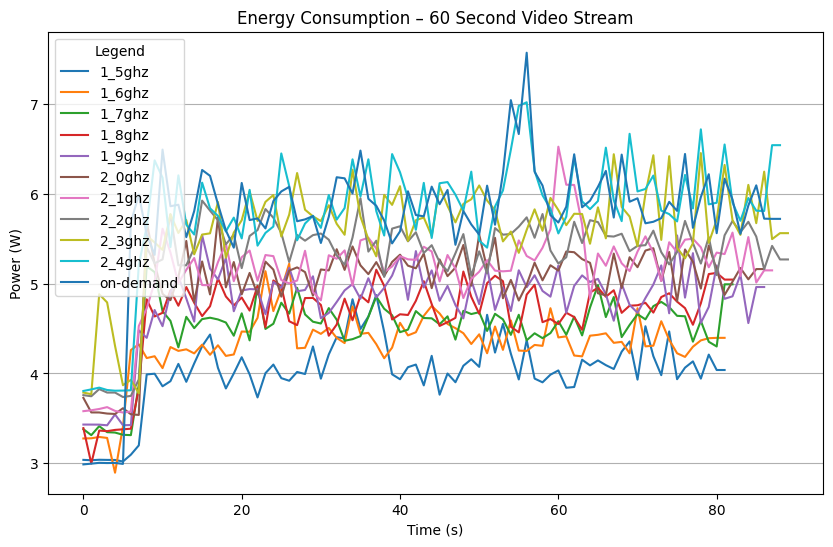

In [19]:
# Codec power over time (power * time)
data_frames = []
exp_names = []
exp_avg_energy = []

for i, file_name in enumerate(sorted(os.listdir('freq-data2')), start=1):
    file_path = os.path.join('freq-data2', file_name)
    data_frames.append(pd.read_excel(file_path, skiprows=range(0, 4)))
    cur_df = data_frames[-1]
    cur_df.columns = data_frames[-1].columns.str.strip()
    exp_name = file_name.split('.')[0]
    cur_df[exp_name] = cur_df['Voltage  (V)'] * cur_df['Current  (A)']
    cur_df.drop(columns=['Time （s）', 'Voltage  (V)', 'Current  (A)'], inplace=True)

    cur_df = cur_df.truncate(before=15, after=75)
    exp_avg_energy.append(cur_df[exp_name].mean() * len(cur_df[exp_name]) / 3600)
    exp_names.append(exp_name)

print(exp_names)
print(exp_avg_energy)

plt.figure(figsize=(10, 6))
plt.plot(exp_names, exp_avg_energy, 'ro--')
plt.title('Energy Consumption – 60 Second Video Stream')
plt.xticks(rotation=45)
plt.xlabel('CPU Frequency')
plt.ylabel('Energy (W * hours)')
plt.grid(True, axis='y')

# Show the plot
plt.show()

df = pd.concat(data_frames, axis=1)

# Align experiment starting points
print(df.head())

# df = df.truncate(after=60)
df.plot(kind='line', y=df.columns, figsize=(10, 6))

# Customize the plot
plt.title('Energy Consumption – 60 Second Video Stream')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid(True, axis='y')
plt.legend(title='Legend')

# Show the plot
plt.show()

['h264-25M', 'h264-500K', 'h264-50M', 'mjpeg30', 'mjpeg50', 'mjpeg90', 'tiled-spatial', 'webp30', 'webp50']
[0.047542990004999994, 0.04164761390222222, 0.050445476169722225, 0.034869610134444444, 0.03575900611333334, 0.05937691905416667, 0.050976124998888886, 0.27616742085222223, 0.29096309188722225]


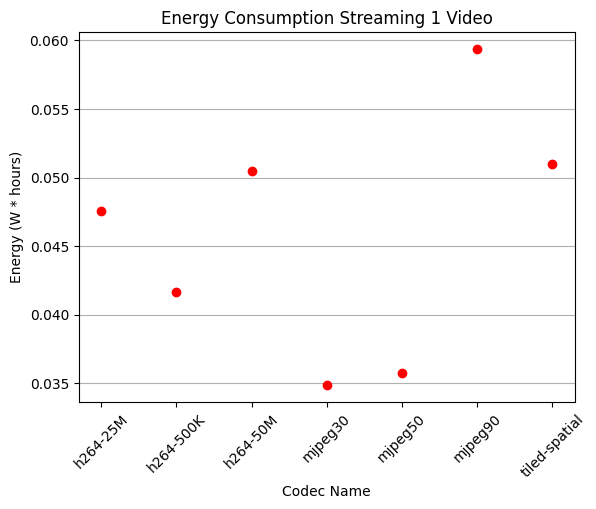

   h264-25M  h264-500K  h264-50M   mjpeg30   mjpeg50   mjpeg90  tiled-spatial  \
0  2.935880   2.781555  2.571562  2.610776  2.682733  2.809166       2.569566   
1  2.582226   2.780080  2.543324  2.608932  2.612622  2.811275       2.580741   
2  2.669568   2.571355  2.555167  2.606625  2.611495  2.817267       2.570747   
3  2.565569   2.748354  2.565414  2.582997  2.759953  2.817253       2.590992   
4  2.578691   2.588069  2.567715  2.600217  2.616364  2.795107       2.680638   

     webp30    webp50  
0  2.807680  2.639273  
1  2.808456  2.626306  
2  2.801178  2.629176  
3  2.779040  2.589252  
4  2.776155  2.649985  


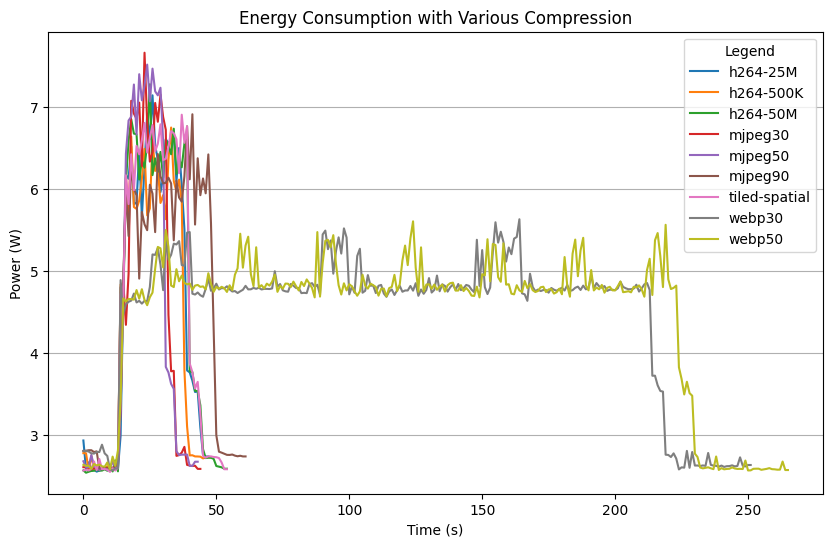

In [12]:
# Codec power over time (power * time)
data_frames = []
exp_names = []
exp_avg_energy = []
# exp_min_energy = []
# exp_max_energy = []

for i, file_name in enumerate(sorted(os.listdir('codec-data')), start=1):
    file_path = os.path.join('codec-data', file_name)
    data_frames.append(pd.read_excel(file_path, skiprows=range(0, 4)))
    cur_df = data_frames[-1]
    cur_df.columns = data_frames[-1].columns.str.strip()
    exp_name = file_name.split('.')[0]
    cur_df[exp_name] = cur_df['Voltage  (V)'] * cur_df['Current  (A)']
    cur_df.drop(columns=['Time （s）', 'Voltage  (V)', 'Current  (A)'], inplace=True)

    cur_df = cur_df[cur_df[exp_name] > 3.0]
    exp_avg_energy.append(cur_df[exp_name].mean() * len(cur_df[exp_name]) / 3600)
    # exp_min_energy.append(exp_avg_energy[-1] - cur_df[exp_name].min() * len(cur_df[exp_name]) / 3600)
    # exp_max_energy.append(cur_df[exp_name].max() * len(cur_df[exp_name]) / 3600 - exp_avg_energy[-1])

    exp_names.append(exp_name)

print(exp_names)
print(exp_avg_energy)

# plt.errorbar(exp_names, exp_avg_energy, yerr=[exp_min_energy, exp_max_energy], fmt="ro", capsize=4, ecolor = "black")
plt.plot(exp_names[:-2], exp_avg_energy[:-2], 'ro')
plt.title('Energy Consumption Streaming 1 Video')
plt.xticks(rotation=45)
plt.xlabel('Codec Name')
plt.ylabel('Energy (W * hours)')
plt.grid(True, axis='y')

# Show the plot
plt.show()

df = pd.concat(data_frames, axis=1)

# Align experiment starting points
print(df.head())

# df = df.truncate(after=60)
df.plot(kind='line', y=df.columns, figsize=(10, 6))

# Customize the plot
plt.title('Energy Consumption with Various Compression')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid(True, axis='y')
plt.legend(title='Legend')

# Show the plot
plt.show()

In [13]:
plot_experiment('./TC66C-exp1.xlsx', title='Experiment 1')

FileNotFoundError: [Errno 2] No such file or directory: './TC66C-exp1.xlsx'

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1286       0.50527   2.591328
1         1        5.1284       0.59373   3.044885
2         2        5.1284       0.55633   2.853083
3         3        5.1281       0.55286   2.835121
4         4        5.1283       0.49831   2.555483


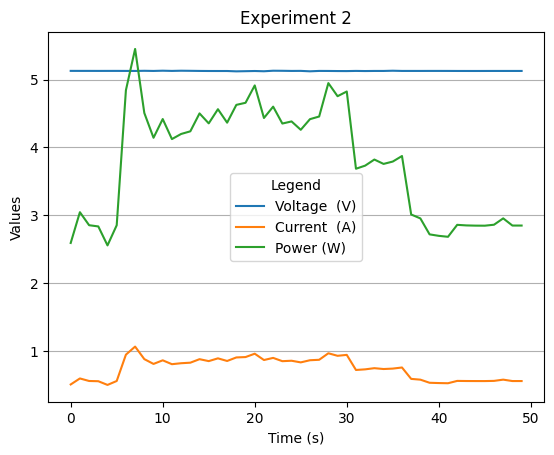

In [ ]:
plot_experiment('./TC66C-exp2.xlsx', title='Experiment 2')

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1274       0.70503   3.614971
1         1        5.1298       0.55680   2.856273
2         2        5.1298       0.50492   2.590139
3         3        5.1279       0.55482   2.845061
4         4        5.1277       0.55553   2.848591


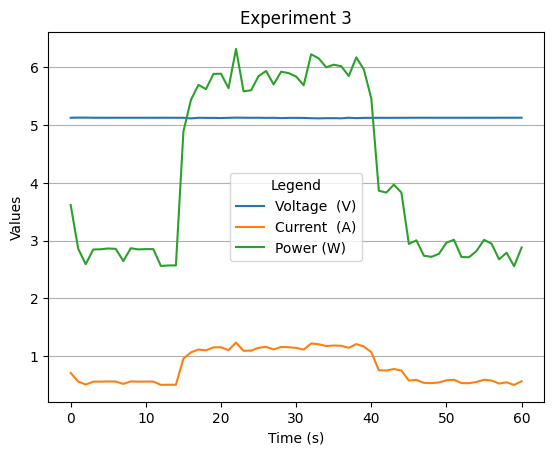

In [ ]:
plot_experiment('./TC66C-exp3.xlsx', title='Experiment 3')

   Experiment 1  Experiment 2  Experiment 3
0           NaN           NaN      3.614971
1           NaN           NaN      2.856273
2      2.579177           NaN      2.590139
3      2.873726           NaN      2.845061
4      2.800756           NaN      2.848591


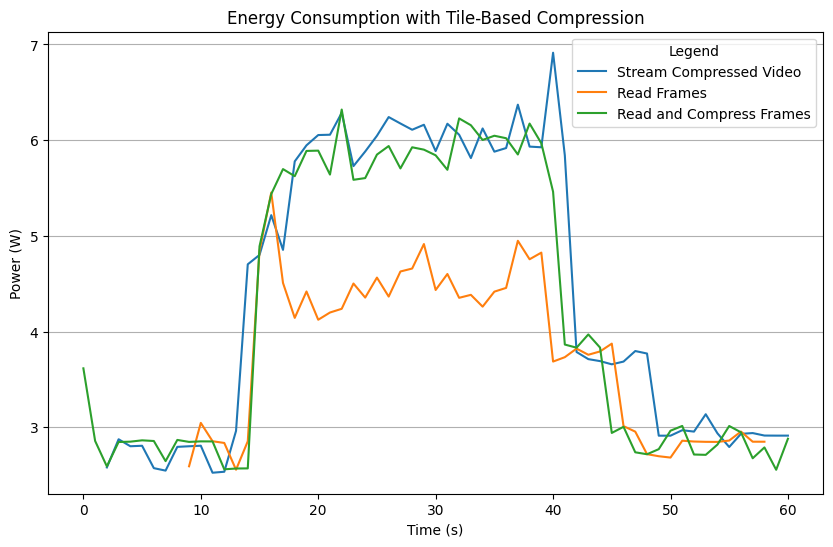

In [ ]:
data_frames = []
files = ['./TC66C-exp1.xlsx', './TC66C-exp2.xlsx', './TC66C-exp3.xlsx']

for i, file in enumerate(files, start=1):
    data_frames.append(pd.read_excel(file, skiprows=range(0, 4)))
    cur_df = data_frames[-1]
    cur_df.columns = data_frames[-1].columns.str.strip()
    cur_df[f'Experiment {i}'] = cur_df['Voltage  (V)'] * cur_df['Current  (A)']
    cur_df.drop(columns=['Time （s）', 'Voltage  (V)', 'Current  (A)'], inplace=True)

df = pd.concat(data_frames, axis=1)

# Align experiment starting points
df['Experiment 1'] = df['Experiment 1'].shift(2)
df['Experiment 2'] = df['Experiment 2'].shift(9)
print(df.head())

df.rename(columns={
    'Experiment 1': 'Stream Compressed Video',
    'Experiment 2': 'Read Frames',
    'Experiment 3': 'Read and Compress Frames'
}, inplace=True)

df.plot(kind='line', y=df.columns, figsize=(10, 6))

# Customize the plot
plt.title('Energy Consumption with Tile-Based Compression')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid(True, axis='y')
plt.legend(title='Legend')

# Show the plot
plt.show()

   Experiment 1  Experiment 2  Experiment 3  Experiment 4  Experiment 5
0      2.579177      4.326582      3.667485      2.921593      3.751931
1      2.873726      2.870136      2.876752      2.893171      3.343633
2      2.800756      2.872863      2.987901      3.652008      3.333265
3      2.805785      3.758992      3.622048      3.364313      3.448836
4      2.571793      3.633221      3.695535      3.763689      3.631977


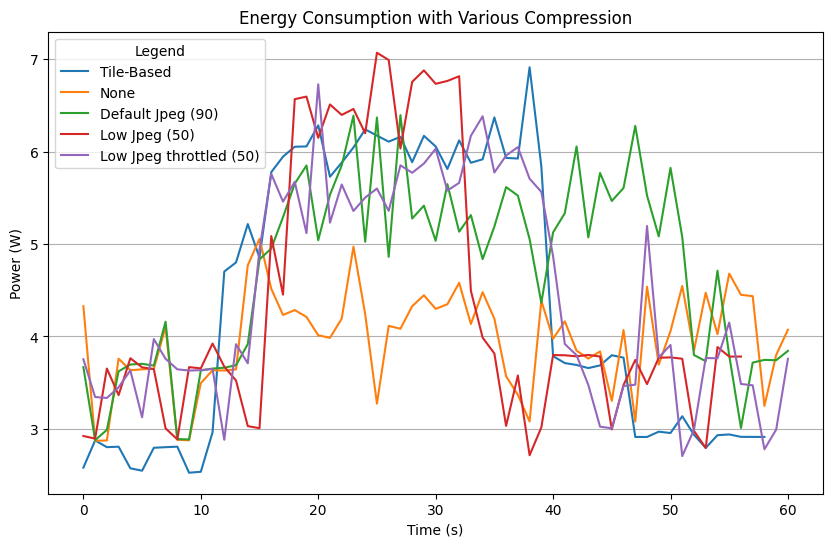

In [ ]:
data_frames = []
files = ['./TC66C-exp1.xlsx', './TC66C-exp4.xlsx', './TC66C-exp5.xlsx', './TC66C-exp6.xlsx', './TC66C-exp7.xlsx']

for i, file in enumerate(files, start=1):
    data_frames.append(pd.read_excel(file, skiprows=range(0, 4)))
    cur_df = data_frames[-1]
    cur_df.columns = data_frames[-1].columns.str.strip()
    cur_df[f'Experiment {i}'] = cur_df['Voltage  (V)'] * cur_df['Current  (A)']
    cur_df.drop(columns=['Time （s）', 'Voltage  (V)', 'Current  (A)'], inplace=True)

df = pd.concat(data_frames, axis=1)

# Align experiment starting points
# df['Experiment 1'] = df['Experiment 1'].shift(2)
# df['Experiment 2'] = df['Experiment 2'].shift(9)
print(df.head())

df.rename(columns={
    'Experiment 1': 'Tile-Based',
    'Experiment 2': 'None',
    'Experiment 3': 'Default Jpeg (90)',
    'Experiment 4': 'Low Jpeg (50)',
    'Experiment 5': 'Low Jpeg throttled (50)'
}, inplace=True)

df = df.truncate(after=60)
df.plot(kind='line', y=df.columns, figsize=(10, 6))

# Customize the plot
plt.title('Energy Consumption with Various Compression')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid(True, axis='y')
plt.legend(title='Legend')

# Show the plot
plt.show()

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1284       0.49907   2.559431
1         1        5.1281       0.49921   2.559999
2         2        5.1281       0.51669   2.649638
3         3        5.1283       0.49790   2.553381
4         4        5.1285       0.49811   2.554557


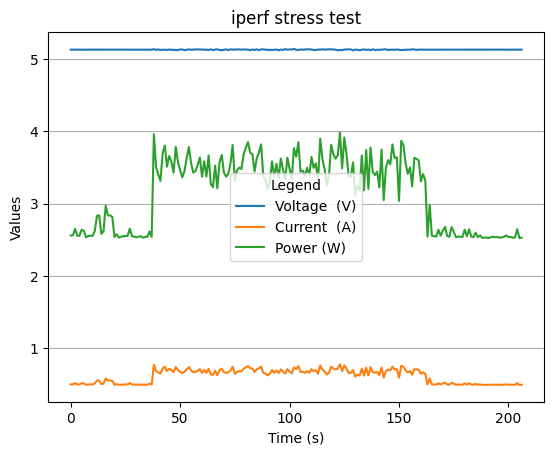

In [ ]:
# iperf network stress test experiment
plot_experiment('./TC66C-exp8.xlsx', title='iperf stress test')

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1287       0.71268   3.655122
1         1        5.1282       0.55774   2.860202
2         2        5.1284       0.56036   2.873750
3         3        5.1286       0.65387   3.353438
4         4        5.1281       0.70911   3.636387


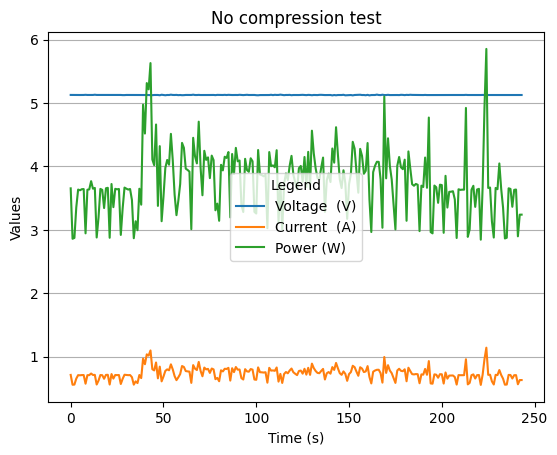

In [ ]:
# plot_experiment('data/TC66C-exp4.xlsx', title='No compression test')
plot_experiment('./TC66C-exp9.xlsx', title='No compression test')